In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from pathlib import Path
import src.notebooks.geoutils as geoutils
import rasterio
import pickle5 as pickle
import matplotlib as mpl
import matplotlib.pyplot as plt

## Plotting Settings

In [2]:
%matplotlib inline


In [3]:
dpi = 300
mpl.rcParams['figure.dpi']= dpi

## Get Necessary Paths

In [4]:
# Prints the contents of specified directory
def print_dir(path):
    dir_contents = [p for p in path.iterdir()]
    display(dir_contents)

In [5]:
# get the current working directory
Path.cwd()

PosixPath('/home/solaris')

In [6]:
data = Path('/home/solaris/processedBuildingLabels/data')

In [7]:
labels = Path(data/'labels')

In [8]:
b3_labels = Path(labels/'AOI_1_RIO_polygons_solution_3band.csv')
b8_labels = Path(labels/'AOI_1_RIO_polygons_solution_8band.csv')
artifacts_path = Path(Path.cwd()/'src/notebooks/artifacts')
gdf_path = Path(artifacts_path/'gdf')
df_path = Path(artifacts_path/'df')


## Read pickled dataframe

### Dataframe containing all the paths

In [9]:
df = geoutils.read_pickle(df_path)
df.head()

,3band,8band,geojson,image_number,geo_extension,raster_extension_3,raster_extension_8,geoshape
0,processedBuildingLabels/data/rasters_vectors/3...,processedBuildingLabels/data/rasters_vectors/8...,processedBuildingLabels/data/rasters_vectors/g...,1,geojson,tif,tif,"(0, 1)"
1,processedBuildingLabels/data/rasters_vectors/3...,processedBuildingLabels/data/rasters_vectors/8...,processedBuildingLabels/data/rasters_vectors/g...,2,geojson,tif,tif,"(0, 1)"
2,processedBuildingLabels/data/rasters_vectors/3...,processedBuildingLabels/data/rasters_vectors/8...,processedBuildingLabels/data/rasters_vectors/g...,3,geojson,tif,tif,"(0, 1)"
3,processedBuildingLabels/data/rasters_vectors/3...,processedBuildingLabels/data/rasters_vectors/8...,processedBuildingLabels/data/rasters_vectors/g...,4,geojson,tif,tif,"(0, 1)"
4,processedBuildingLabels/data/rasters_vectors/3...,processedBuildingLabels/data/rasters_vectors/8...,processedBuildingLabels/data/rasters_vectors/g...,5,geojson,tif,tif,"(0, 1)"


### Dataframe containing paths that contain non-empty polygons

In [10]:
gdf = geoutils.read_pickle(gdf_path)
gdf.head()

,3band,8band,geojson,image_number,geo_extension,raster_extension_3,raster_extension_8,geoshape
0,processedBuildingLabels/data/rasters_vectors/3...,processedBuildingLabels/data/rasters_vectors/8...,processedBuildingLabels/data/rasters_vectors/g...,12,geojson,tif,tif,"(5, 19)"
1,processedBuildingLabels/data/rasters_vectors/3...,processedBuildingLabels/data/rasters_vectors/8...,processedBuildingLabels/data/rasters_vectors/g...,30,geojson,tif,tif,"(2, 19)"
2,processedBuildingLabels/data/rasters_vectors/3...,processedBuildingLabels/data/rasters_vectors/8...,processedBuildingLabels/data/rasters_vectors/g...,44,geojson,tif,tif,"(1, 19)"
3,processedBuildingLabels/data/rasters_vectors/3...,processedBuildingLabels/data/rasters_vectors/8...,processedBuildingLabels/data/rasters_vectors/g...,46,geojson,tif,tif,"(11, 19)"
4,processedBuildingLabels/data/rasters_vectors/3...,processedBuildingLabels/data/rasters_vectors/8...,processedBuildingLabels/data/rasters_vectors/g...,47,geojson,tif,tif,"(15, 19)"


### Read single raster image from dataframe

In [11]:
raster_path = gdf['3band'][0]

In [12]:
directions = ['left','bottom','right','top']

### Extract bounds from raster image and store in dictionary

In [13]:
with rasterio.open(raster_path) as r:
    a = {direction:value for direction,value in zip(directions,r.bounds)}
print(a)

{'left': -43.7732462563, 'bottom': -22.9233065632, 'right': -43.7712799712, 'top': -22.9214851954}


## Create Folium Map Object

In [14]:
latitude = -22.9233065632 
longitude = -43.7732462563


In [15]:
map = folium.Map(
                location = [latitude, longitude], 
                zoom_start = 30)

### Make sure crs in EPSG:4326

In [16]:
directions =  ['left','bottom','right','top']
with rasterio.open(str(gdf['3band'][0])) as r:
    a = {direction:val for val,direction in zip(r.bounds,directions)}
    raster = r.read()

In [17]:
top_left = [a['top'],a['left']]
bottom_right = [a['bottom'],a['right']]

In [18]:
bounds = [top_left,bottom_right]

In [19]:
map

In [20]:
from rasterio.plot import reshape_as_raster, reshape_as_image

In [21]:
image = reshape_as_image(raster)

In [22]:
folium.raster_layers.ImageOverlay(
    image=image,
    bounds=bounds,
    opacity=0.6
).add_to(map);

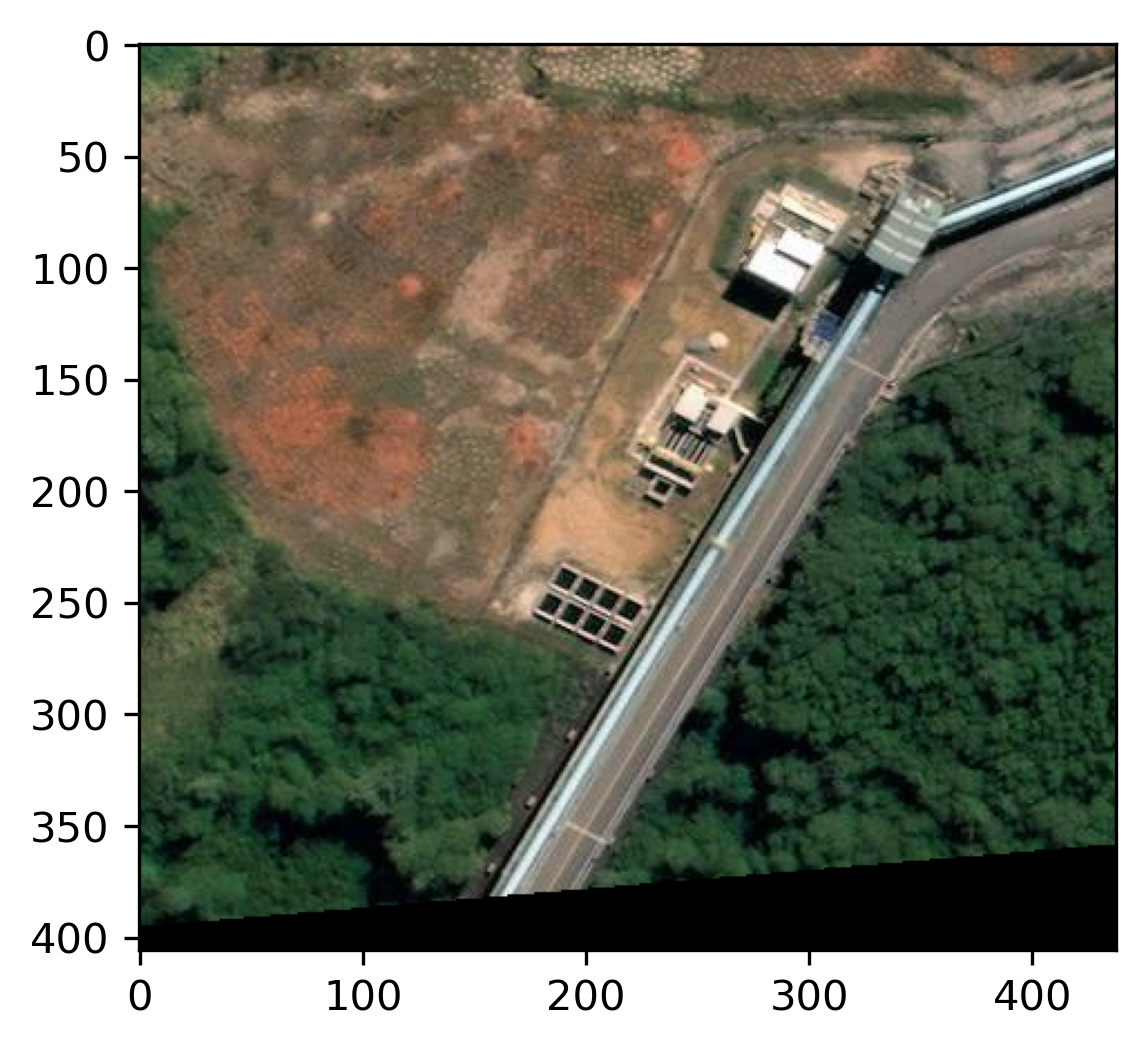

In [23]:
plt.imshow(image);

In [24]:
map

In [25]:
# folium.bounds = [[lat_min, lon_min], [lat_max, lon_max]]